# SVM

## 1.SVM 개념이해(Support Vector Machine)

### 기본 아이디어
두 클래스 사이에 가장 넓은 도로를 내는 것.
마진을 가장 크게 하는 결정 경계선

### 분류 모델, 회귀 모델에 모두 사용 가능함

### 결정 경계(Decision Boundary)
클래스를 구분하는 경계선, 도로의 중앙선
결정 경계가 바로 모델(hyper plane)이다.

### 벡터(Vector)
모든 데이터 포인트

### 서포트 벡터(Support Vector)
결정 경계와 가까운 데이터 포인트, 도로 위의 데이터 포인트
마진의 크기와 결정경계에 영향을 준다.

### 마진
서포트벡터와 결정경계 사이의 거리, 도로의 폭
폭이 가장 넓은 도로를 뚫는 것이 SVM의 목표
마진이 클수록 새로운 데이터에 대해 안정적 분류가 가능해집니다.

## 결정 경계와 마진

### 모델1: 완벽히 분류하지만 마진이 좁은 모델
=> 마진이 좁아서 클래스에서 조금만 벗어나도 잘못 분류될 가능성이 높다.

### 모델2: 오차를 약간 허용하지만 마진이 넓은 모델
=> 마진이 넓어서 기존 데이터에서 조금 벗어나도 안정적으로 분류 가능

=> 과거, 현재, 미래의 데이터에 모두 잘 부합하는 모델을 만드는 것이 더 중요한 목표이기 때문에,
모델2가 더 나은 결정 경계(모델)이라고 할 수 있다.

## 마진과 오류
### SVM의 최적화
마진(도로의 폭)은 가능한 넓게
오류는 가능한 적게

### 마진의 크기와 오류 허용 정도
서로 Trade-Off 관계에 있음

### 조절 가능한 인자: 비용(C)
- 오류에 대한 허용 정도
- 학습 시 Train Set의 오류를 허용하지 않으려는 비용

## 비용 (C)

### C값을 높이는 경우
- 오류를 허용하지 않으려고 쓰는 비용 증가
- 오류를 허용하지 않으려는 마진과 결정 경계를 찾음 => Overfitting 가능성 높아짐

### C값을 낮추는 경우
- 오류를 허용하지 않으려고 쓰는 비용 감소
- 오류를 허용해도 되는 마진과 결정 경계를 찾음 => Underfitting 가능성 높아짐


### (1) import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_classification

from sklearn.svm import SVC # SVC: Classifier(분류 모델), SVR: Regressor(회귀 모델)

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) 함수 생성

* svm 모델을 시각화 하는 함수를 생성해 봅시다.

In [2]:
def svm_visualize(x, y, model, title = "") :

    xx, yy = np.meshgrid(np.linspace(x[:,0].min(), x[:,0].max(), 50),
                        np.linspace(x[:,1].min(), x[:,1].max(), 50)) # mesh grid

    # 메쉬 그리드값에 대해 모델 부터 거리 값 만들기.
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 그래프 그리기
    plt.figure(figsize=(4, 4))
    # 데이터 산점도
    sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)
    # levels= 0 모델 ,  -1, 1 은 마진 경계
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors = 'gray',linestyles  = ['--','-','--'])
    plt.title(title)
    plt.axis("tight")
    plt.show()

### (3) 샘플데이터 생성

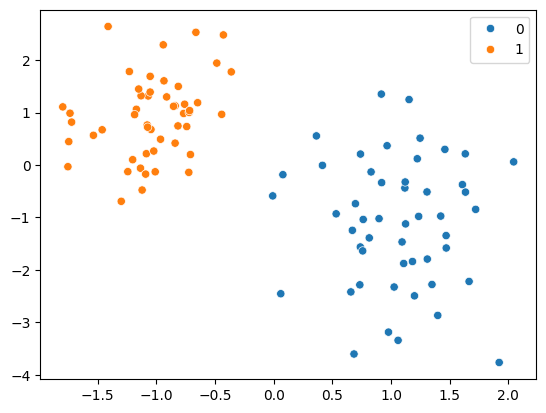

In [3]:
seed = 8

x, y = make_classification(n_samples=100,
                        n_features=2,
                        n_redundant=0,
                        weights = [0.5, 0.5],  # class 0과 1의 비율 조정 ==> class imbalance 상황만들기
                        n_clusters_per_class=1,
                        random_state=seed)
sns.scatterplot(x=x[:,0],y=x[:,1], hue = y)
plt.show()

### (4) SVM 모델 생성 및 시각화

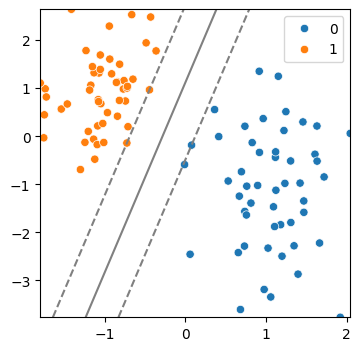

In [4]:
model = SVC(kernel = 'linear', C = 10)
model.fit(x,y)
svm_visualize(x, y, model)

### (5) 결정 경계와 마진

* 새로운 샘플 데이터를 다시 생성해 봅시다.

In [5]:
seed = 34
x, y = make_classification(n_features=2, n_redundant=0, weights = [0.5, 0.5],
                        n_clusters_per_class=1, random_state=seed)

* cost 값을 0.1, ~ 20 사이의 숫자로 변경하며 cost에 따른 모델을 살펴 봅시다.

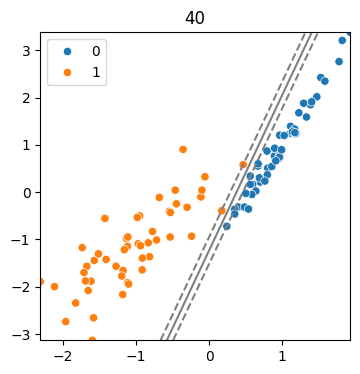

In [6]:
cost = 40
model = SVC(kernel = 'linear', C = cost)
model.fit(x,y)
svm_visualize(x, y, model, cost)

### (6) 선형경계로 분류할 수 없는 데이터셋

### SVM
- 직선 혹은 초평면으로 분류하는 방식 (선형 분류기)
- 실제로는 선형적으로 분류할 수 없는 데이터셋이 더 많음
- 아래 그림처럼 직선으로 분류하게 되면 오차가 커지게 됨

### 커널 트릭(Kernel Trick)
매핑 함수: 비선형 데이터 문제를 해결하기 위해서 고차원 데이터로 변환하는 함수
매핑함수를 사용하게 되면 feature 수가 과도하게 증가하여 연산 시간이 길어짐

kernel trick 사용 시 실제 고차원 feature를 생성하지 않고도 추가한 것과 같은 효과를 얻도록 함 (등고선 생성 방식과 유사함)

### 폴리(poly)
- 다차항, polynomial
- 주요 하이퍼파라미터: degree(차수), coef0(다차항 별 영향도 조절), C(오차 비용), gamma(결정경계 복잡도)

### RBF(Radial Basis Function)
- 가우시안 커널로 칭함. 가우시안분포(정규분포) 이용
- 주요 하이퍼파라미터: C(오차 비용), gamma(결정경계 복잡도)

### 시그모이드(sigmoid)


* 데이터를 생성하고 시각화 해 봅시다.

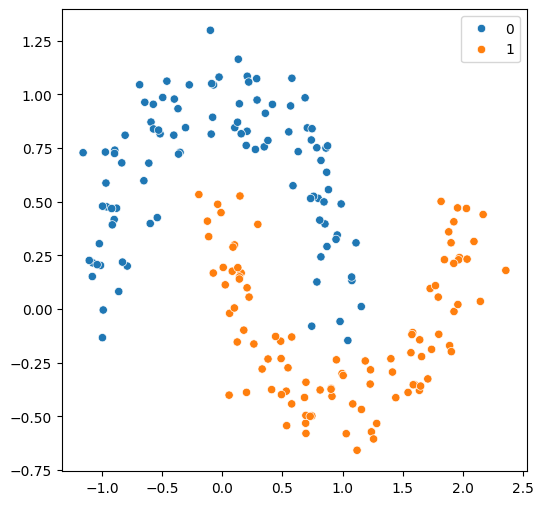

In [7]:
x, y = make_moons(n_samples = 200, noise = .13, random_state = 10)

plt.figure(figsize = (6,6))
sns.scatterplot(x=x[:,0], y=x[:,1], hue = y)
plt.show()

* 선형경계로 분류

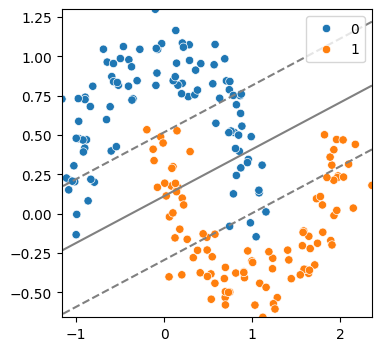

In [8]:
model = SVC(kernel = 'linear')
model.fit(x,y)
svm_visualize(x, y, model)

* 커널 트릭 사용 : rbf

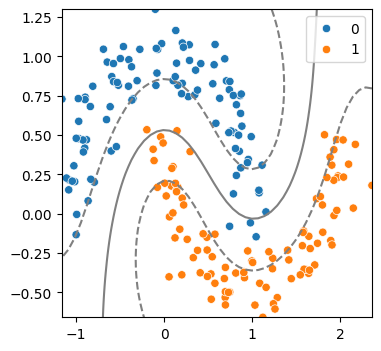

In [9]:
model = SVC(kernel = 'rbf', C = 1)
model.fit(x,y)
svm_visualize(x, y, model)

C값(비용)을 높여보면

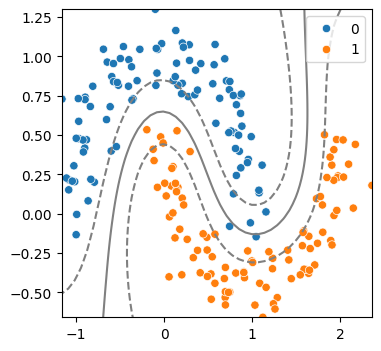

In [10]:
model = SVC(kernel = 'rbf', C = 5)
model.fit(x,y)
svm_visualize(x, y, model)

### (7) 하이퍼파라미터

* Cost :
    * 오류를 허용하지 않으려는 비용(노력!)
    * 값이 클수록 오류를 허용하지 않기 위한 경계를 만들려고 함.
* gamma :
    * 결정경계의 곡률
    * 값이 클수록 곡률반경이 작아짐.

* Cost에 따라 결정 경계가 어떻게 달라지는지 살펴 봅시다.

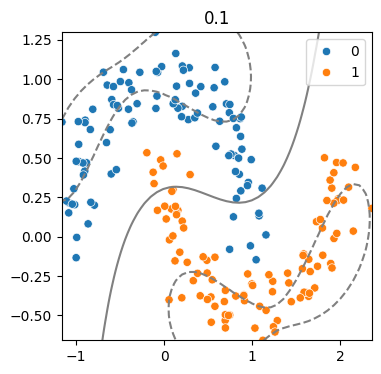

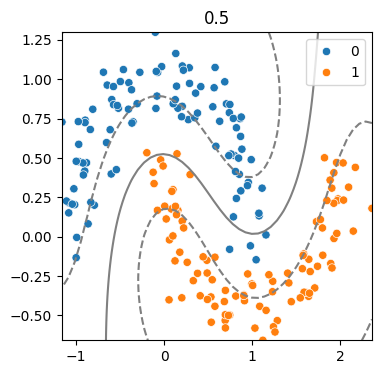

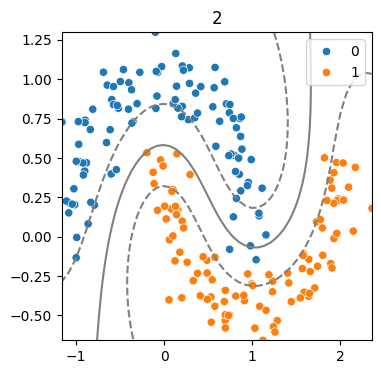

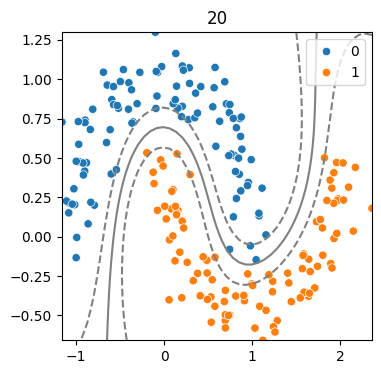

In [10]:
for cost in [0.1, .5, 2, 20] :
    model = SVC(kernel = 'rbf', C = cost)
    model.fit(x,y)
    svm_visualize(x, y, model, cost)

* gamma에 따라 결정 경계가 어떻게 달라지는지 살펴 봅시다.

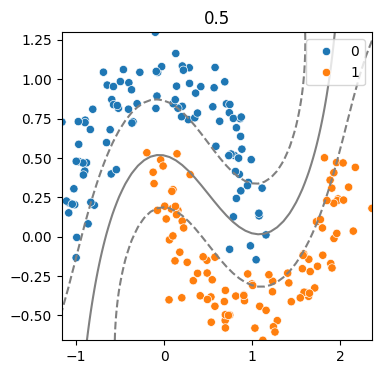

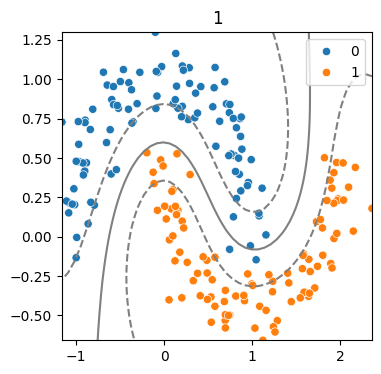

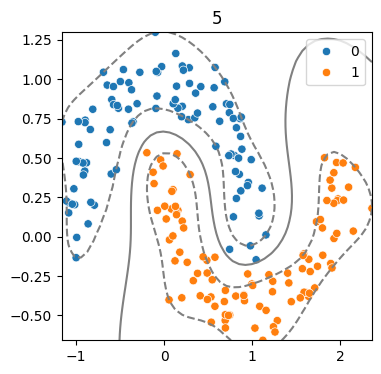

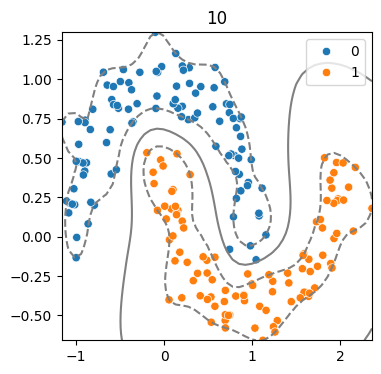

In [ ]:
for g in [.5, 1, 5, 10] :
    model = SVC(kernel = 'rbf', C = 2, gamma = g)
    model.fit(x,y)
    svm_visualize(x, y, model, g)

## 2.데이터 준비

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (Target 변수)


In [12]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(5000, random_state = 2022)

### (1) 데이터 정리

In [13]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) 데이터분할1 : x, y 나누기

In [14]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [15]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

### (5) 데이터분할2 : train : validation 나누기

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

### (6) Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

### (1) 필요한 함수 불러오기

* SVM
    * SVC : 분류
    * SVR : 회귀

In [18]:
# 모델링을 위해
from sklearn.svm import SVC

# 평가를 위해.
from sklearn.metrics import *

### (2) 선언

In [19]:
model = SVC()

### (3) 모델링(학습)

In [20]:
model.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### (4) 검증 : 예측

In [21]:
pred = model.predict(x_val)

### (5) 검증 : 평가

* confusion matrix

In [22]:
confusion_matrix(y_val, pred)

array([[436, 295],
       [204, 565]])

* classification report

In [23]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       LEAVE       0.68      0.60      0.64       731
        STAY       0.66      0.73      0.69       769

    accuracy                           0.67      1500
   macro avg       0.67      0.67      0.66      1500
weighted avg       0.67      0.67      0.67      1500



## 4.복습문제
* C와 gamma 값을 조절한 모델 2개를 만들어 학습 및 검증을 수행해 봅시다.

### (1) 모델1

In [42]:
param_vals = [0.1, 0.5, 1, 5, 10]
accuracies = []
for cost in param_vals:
    model = SVC(C=cost, gamma=1)
    model.fit(x_train, y_train)
    pred= model.predict(x_val)
    result = classification_report(y_val, pred, output_dict=True)
    accuracies.append(result['accuracy'])
    print(f"C={cost}일 때 Classification Report")
    print(result)
print(accuracies)

C=0.1일 때 Classification Report
{'LEAVE': {'precision': 0.696, 'recall': 0.47606019151846785, 'f1-score': 0.5653939886271324, 'support': 731.0}, 'STAY': {'precision': 0.617, 'recall': 0.8023407022106632, 'f1-score': 0.6975692481628039, 'support': 769.0}, 'accuracy': 0.6433333333333333, 'macro avg': {'precision': 0.6565, 'recall': 0.6392004468645656, 'f1-score': 0.6314816183949681, 'support': 1500.0}, 'weighted avg': {'precision': 0.6554993333333333, 'recall': 0.6433333333333333, 'f1-score': 0.6331558383490866, 'support': 1500.0}}
C=0.5일 때 Classification Report
{'LEAVE': {'precision': 0.6474074074074074, 'recall': 0.5978112175102599, 'f1-score': 0.6216216216216216, 'support': 731.0}, 'STAY': {'precision': 0.6436363636363637, 'recall': 0.6905071521456437, 'f1-score': 0.6662484316185696, 'support': 769.0}, 'accuracy': 0.6453333333333333, 'macro avg': {'precision': 0.6455218855218856, 'recall': 0.6441591848279518, 'f1-score': 0.6439350266200956, 'support': 1500.0}, 'weighted avg': {'precisi

### (2) 모델2

In [43]:
param_vals = [0.1, 0.5, 1, 5, 10]
accuracies = []
for g in param_vals:
    model = SVC(C=1, gamma=g)
    model.fit(x_train, y_train)
    pred= model.predict(x_val)
    result = classification_report(y_val, pred, output_dict=True)
    accuracies.append(result['accuracy'])
    print(f"gamma={g}일 때 Classification Report")
    print(result)
print(accuracies)

gamma=0.1일 때 Classification Report
{'LEAVE': {'precision': 0.7035775127768313, 'recall': 0.5649794801641587, 'f1-score': 0.6267071320182094, 'support': 731.0}, 'STAY': {'precision': 0.651697699890471, 'recall': 0.7737321196358907, 'f1-score': 0.7074910820451843, 'support': 769.0}, 'accuracy': 0.672, 'macro avg': {'precision': 0.6776376063336511, 'recall': 0.6693557999000247, 'f1-score': 0.6670991070316968, 'support': 1500.0}, 'weighted avg': {'precision': 0.6769804620370905, 'recall': 0.672, 'f1-score': 0.6681223703987053, 'support': 1500.0}}
gamma=0.5일 때 Classification Report
{'LEAVE': {'precision': 0.6601503759398496, 'recall': 0.600547195622435, 'f1-score': 0.6289398280802292, 'support': 731.0}, 'STAY': {'precision': 0.6502994011976048, 'recall': 0.706111833550065, 'f1-score': 0.6770573566084788, 'support': 769.0}, 'accuracy': 0.6546666666666666, 'macro avg': {'precision': 0.6552248885687272, 'recall': 0.65332951458625, 'f1-score': 0.652998592344354, 'support': 1500.0}, 'weighted av